<ipython-input-14-91bcbae43279>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = combined_data.groupby('Model').mean().reset_index()
<ipython-input-14-91bcbae43279>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)


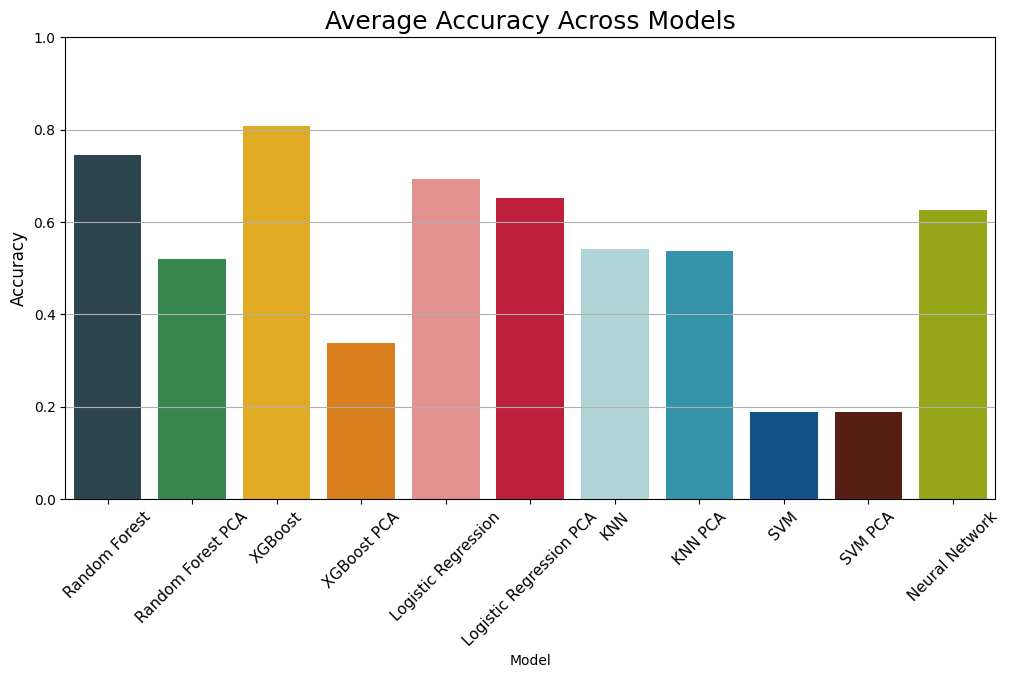

<ipython-input-14-91bcbae43279>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)


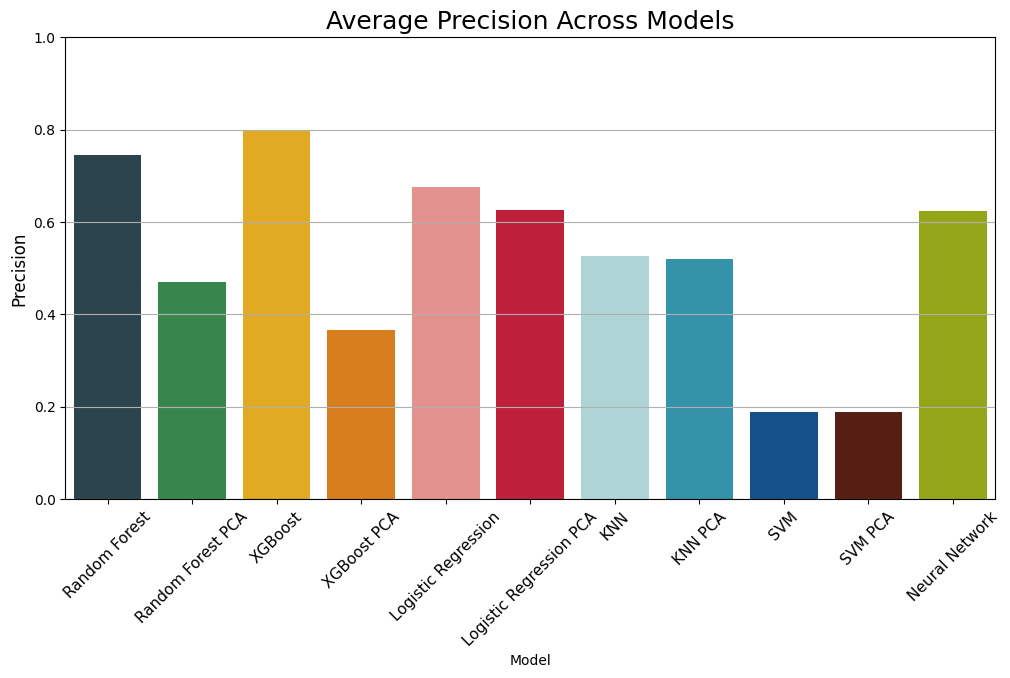

<ipython-input-14-91bcbae43279>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)


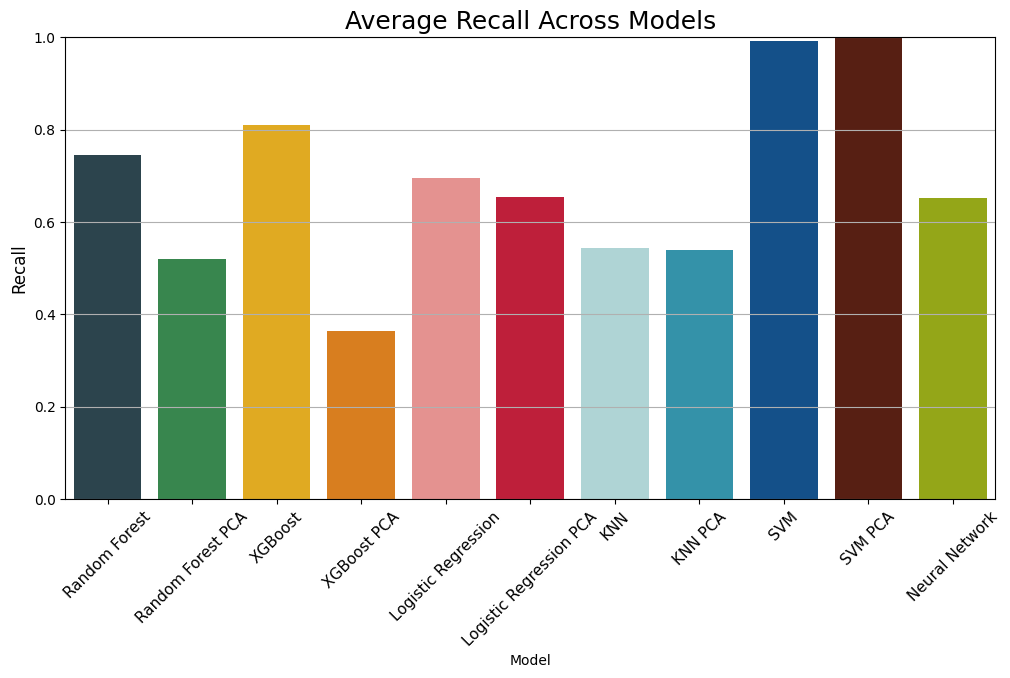

<ipython-input-14-91bcbae43279>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)


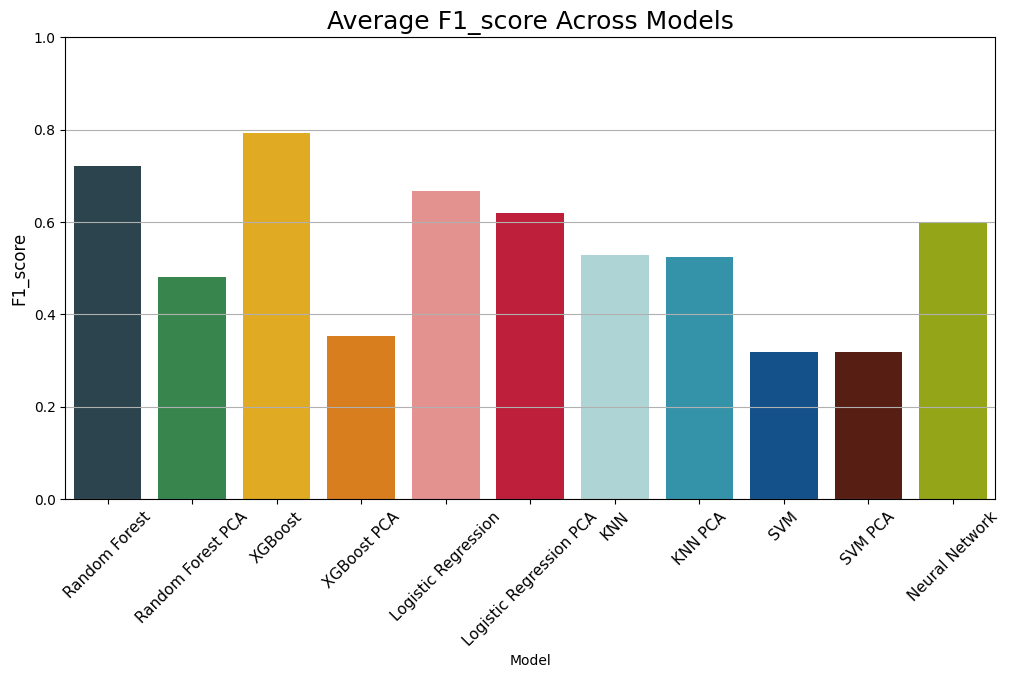

<ipython-input-14-91bcbae43279>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)


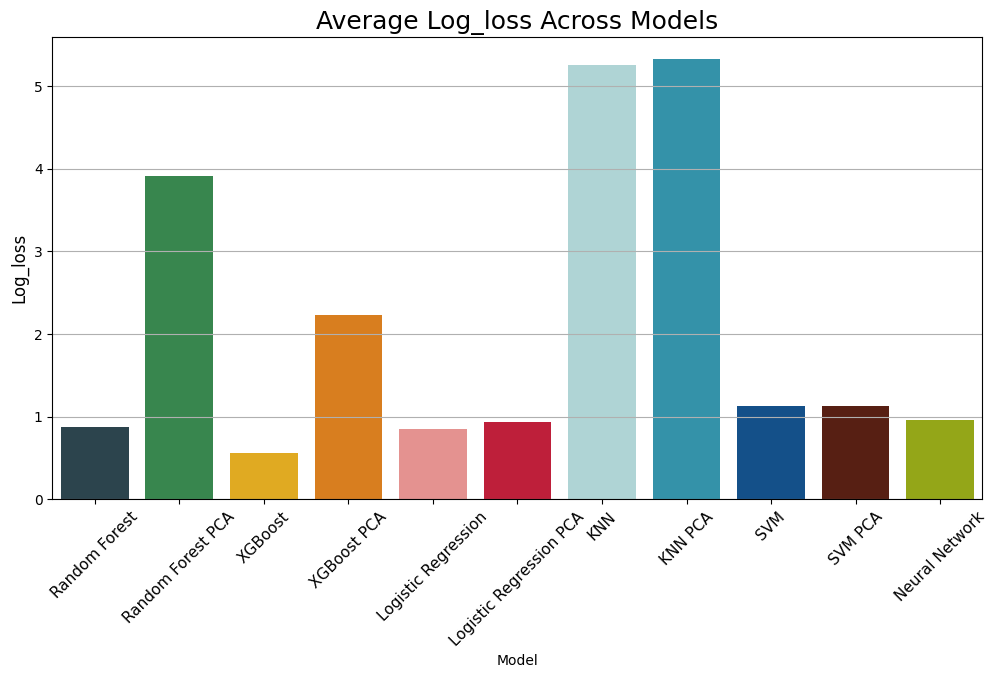

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
neural_network = pd.read_csv('Copy of neuralnetworkcv_results.csv')
random_forrest = pd.read_csv('Copy of randomforrest_cv_results.csv')
random_forrest_pca = pd.read_csv('Copy of randomforrestpca_cv_results.csv')
svm = pd.read_csv('svm_cv_results.csv')
svm_pca = pd.read_csv('Copy of svmpca_cv_results.csv')
xgboost = pd.read_csv('Copy of xgboostCV_results.csv')
xgboost_pca = pd.read_csv('Copy of xgboostPCACV_results.csv')
logistic_regression = pd.read_csv('CV_multilogreg_non_pca.csv')
logistic_regression_pca = pd.read_csv('CV_multilogreg_pca.csv')
knn = pd.read_csv('CV_knn_non_pca.csv')
knn_pca = pd.read_csv('CV_knn_pca.csv')

# Add a 'Model' column to each DataFrame
neural_network['Model'] = 'Neural Network'
random_forrest['Model'] = 'Random Forest'
random_forrest_pca['Model'] = 'Random Forest PCA'
svm['Model'] = 'SVM'
svm_pca['Model'] = 'SVM PCA'
xgboost['Model'] = 'XGBoost'
xgboost_pca['Model'] = 'XGBoost PCA'
logistic_regression['Model'] = 'Logistic Regression'
logistic_regression_pca['Model'] = 'Logistic Regression PCA'
knn['Model'] = 'KNN'
knn_pca['Model'] = 'KNN PCA'

# Combine all DataFrames into one
combined_data = pd.concat([neural_network, random_forrest, random_forrest_pca, svm, svm_pca, xgboost, xgboost_pca,
                           logistic_regression, logistic_regression_pca, knn, knn_pca])

# Define the custom order for models
model_order = [
    'Random Forest', 'Random Forest PCA', 'XGBoost', 'XGBoost PCA',
    'Logistic Regression', 'Logistic Regression PCA', 'KNN', 'KNN PCA',
    'SVM', 'SVM PCA', 'Neural Network'
]

# Apply the custom order to the 'Model' column
combined_data['Model'] = pd.Categorical(combined_data['Model'], categories=model_order, ordered=True)

# Calculate the mean for each metric for each model
mean_data = combined_data.groupby('Model').mean().reset_index()

# Define custom colors for each model
custom_colors = {
    'Random Forest': '#264653',
    'Random Forest PCA': '#2B9348',
    'XGBoost': '#FFB703',
    'XGBoost PCA': '#F77F00',
    'Logistic Regression': '#F28482',
    'Logistic Regression PCA': '#D90429',
    'KNN': '#A8DADC',
    'KNN PCA': '#219EBC',
    'SVM': '#00509D',
    'SVM PCA': '#621708',
    'Neural Network': '#A5BE00'

}

# col_vector <- c("#264653" , "#2B9348" , "#FFB703" , "#F77F00" , "#F28482",
#                 "#D90429",  "#A8DADC" ,  "#219EBC" , "#00509D",
#                 "#621708",   "#A5BE00", "#CB997E", "#6761A8")

# List of metrics to plot
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss']

# Create bar plots for each metric (average of 10 repetitions)
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # Create bar plot and apply custom colors
    sns.barplot(x='Model', y=metric, data=mean_data, palette=custom_colors)

    # Title and labels
    plt.title(f'Average {metric.capitalize()} Across Models', fontsize = 18)
    plt.ylabel(metric.capitalize(), fontsize = 12)
    plt.xticks(rotation=45, fontsize = 11)
    plt.grid(True, axis='y')

    # Set y-axis limits for the first 4 metrics to be between 0 and 1
    if metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        plt.ylim(0, 1)  # Set y-axis from 0 to 1 for the first 4 metrics

    # Save the plot as PNG with adjusted bounding box
    plt.savefig(f'{metric}_barplot.png', bbox_inches='tight')
    plt.show()

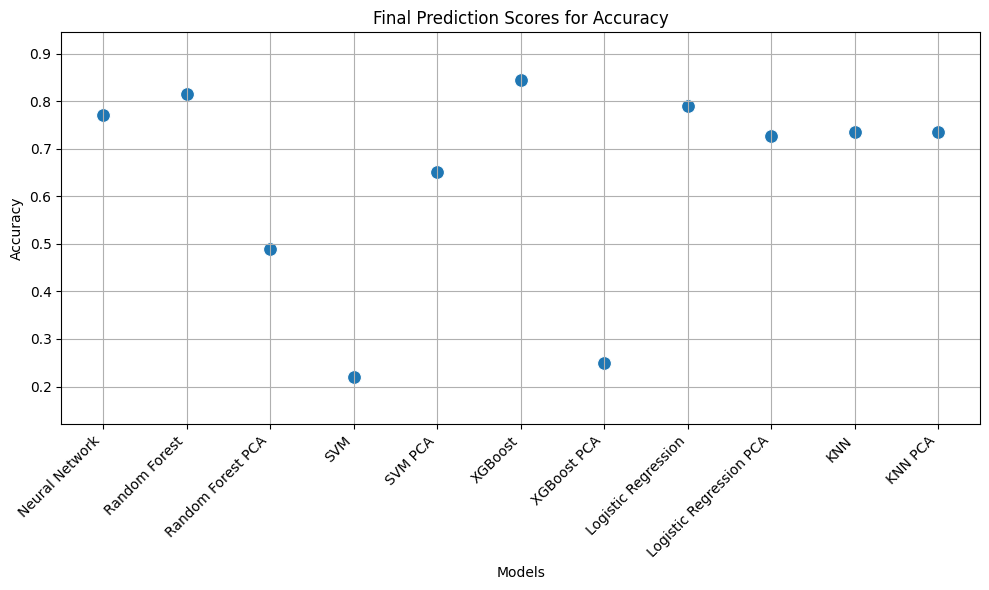

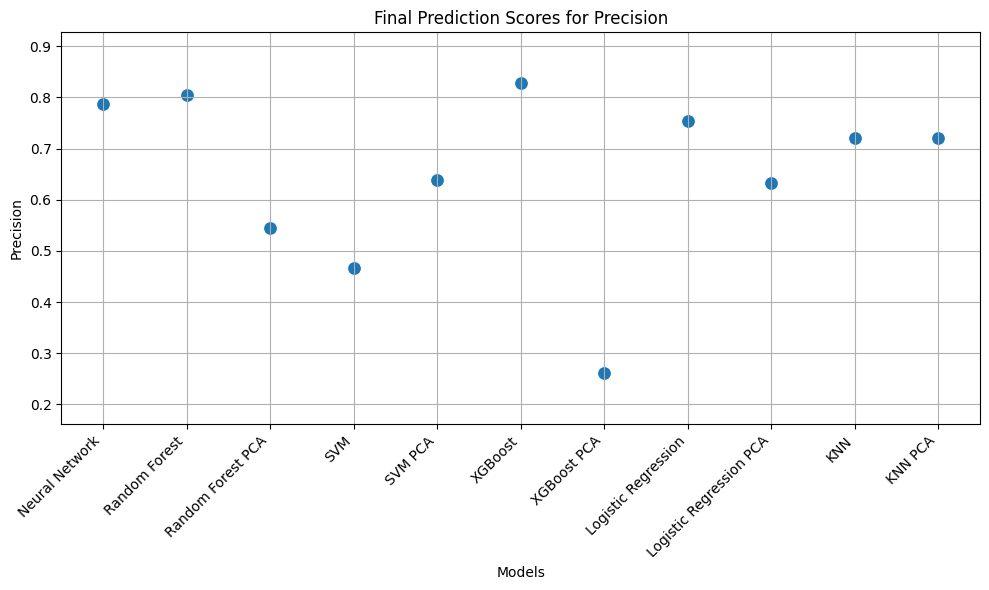

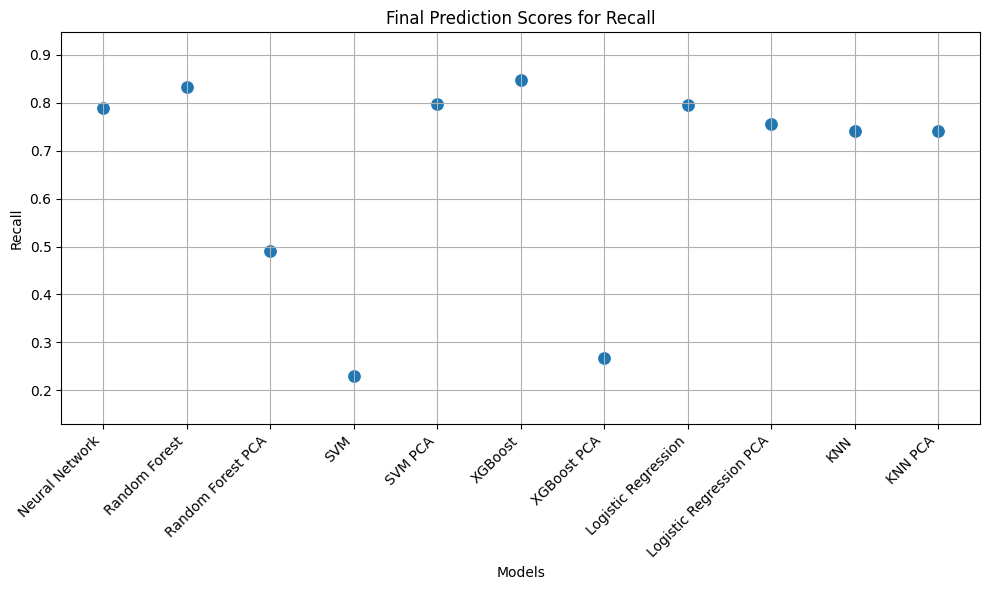

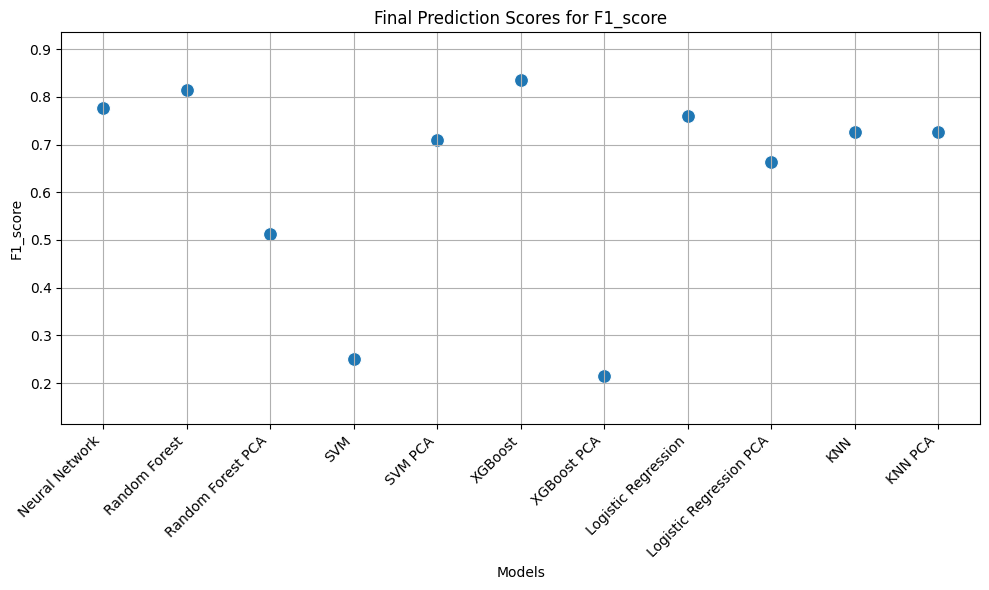

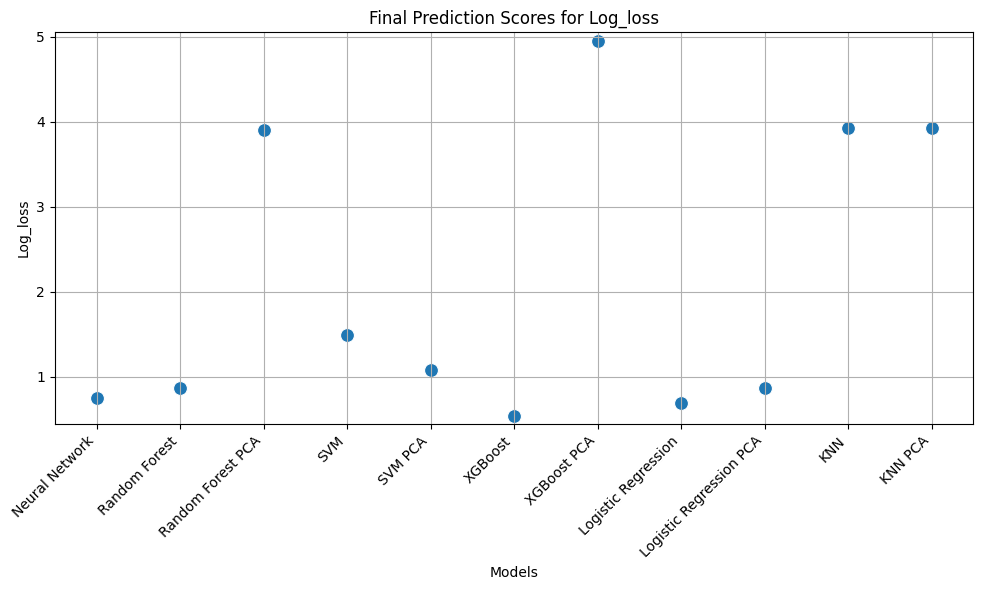

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
neural_network = pd.read_csv('neural_network_score.csv')
random_forrest = pd.read_csv('random_forrest_score.csv')
random_forrest_pca = pd.read_csv('random_forrest_score_pca.csv')
svm = pd.read_csv('svm_score.csv')
svm_pca = pd.read_csv('svm_score_pca.csv')
xgboost = pd.read_csv('xgboost_score.csv')
xgboost_pca = pd.read_csv('xgboost_score_pca.csv')
logistic_regression = pd.read_csv('multi_logreg_non_pca_score.csv')
logistic_regression_pca = pd.read_csv('multi_logreg_pca_score.csv')
knn = pd.read_csv('knn_non_pca_score.csv')
knn_pca = pd.read_csv('knn_pca_score.csv')

# Create a dictionary of results DataFrames
results_dict = {
    'Neural Network': neural_network,
    'Random Forest': random_forrest,
    'Random Forest PCA': random_forrest_pca,
    'SVM': svm,
    'SVM PCA': svm_pca,
    'XGBoost': xgboost,
    'XGBoost PCA': xgboost_pca,
    'Logistic Regression': logistic_regression,
    'Logistic Regression PCA': logistic_regression_pca,
    'KNN': knn,
    'KNN PCA': knn_pca
}

# Create separate dot plots for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss']

for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Prepare the data for plotting
    plot_data = []

    for model_name, df in results_dict.items():
        # Create a DataFrame for the current model's scores
        model_data = pd.DataFrame({
            'Model': [model_name] * len(df),
            'Score': df[metric]
        })
        plot_data.append(model_data)  # Append model data to the list

    # Concatenate all model data into a single DataFrame
    plot_data = pd.concat(plot_data, ignore_index=True)

    # Create a dot plot for the current metric without lines
    sns.scatterplot(data=plot_data, x='Model', y='Score', marker='o', s=100)  # 's' controls the size of the dots

    plt.title(f'Final Prediction Scores for {metric.capitalize()}')
    plt.xlabel('Models')
    plt.ylabel(metric.capitalize())

    plt.xticks(rotation=45, ha='right')


    # Set y-axis limits based on the metric data
    plt.ylim(plot_data['Score'].min() - 0.1, plot_data['Score'].max() + 0.1)  # Adjust range as needed

    plt.grid()
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'final_prediction_scores_{metric}.png')
    plt.show()